#**PyCaret**

Source: https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

# Importing Libraries

In [ ]:
#!pip install pycaret

In [88]:
from pycaret.utils import enable_colab
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from pycaret.classification import *

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Enable 
enable_colab()

Colab mode enabled.


# Getting the Data

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/Carlosrnes/group_work_ml/main/techscape-ecommerce/train.csv')

# Drop Access_ID
df = df.drop(['Access_ID'], axis=1)

# Converting Date type from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [61]:
filters1 = (
    (df['AccountMng_Duration']<=2000)
    &
    (df['FAQ_Duration']<=1500)
    &
    (df['Product_Pages']<=500)
    &
    (df['Product_Duration']<=25000)
    &
    (df['GoogleAnalytics_PageValue']<=300)
)

df_1 = df[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df.shape[0], 4))

df = df[filters1]

Percentage of data kept after removing outliers: 0.9973


In [62]:
df['month'] = df['Date'].dt.month

In [64]:
df = df.drop(['Date', 'FAQ_Pages'], axis=1).reset_index(drop=True)

In [65]:
data = df.sample(frac=0.66, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (6582, 15)
Unseen Data For Predictions: (3390, 15)


# Setting up Environment in PyCaret

In [66]:
exp_clf101 = setup(data = data, target = 'Buy', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Buy
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6582, 15)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


# Comparing All Models

In [67]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8978,0.9185,0.4873,0.7572,0.5913,0.5362,0.5541,0.785
gbc,Gradient Boosting Classifier,0.8936,0.9221,0.5571,0.6887,0.6147,0.5539,0.5588,0.834
lightgbm,Light Gradient Boosting Machine,0.8913,0.9211,0.5627,0.6736,0.6111,0.5487,0.5529,0.199
ada,Ada Boost Classifier,0.8871,0.9067,0.5371,0.6563,0.5889,0.5246,0.5291,0.296
lr,Logistic Regression,0.8841,0.8883,0.3818,0.7261,0.4989,0.4409,0.4707,1.004
lda,Linear Discriminant Analysis,0.8821,0.8898,0.3561,0.7308,0.4773,0.4201,0.4553,0.074
et,Extra Trees Classifier,0.8789,0.8906,0.3348,0.7252,0.4567,0.3989,0.4375,0.773
ridge,Ridge Classifier,0.8752,0.0000,0.2565,0.7653,0.3826,0.3327,0.3951,0.031
knn,K Neighbors Classifier,0.8604,0.7150,0.2335,0.6122,0.3375,0.2766,0.3173,0.158
dt,Decision Tree Classifier,0.8593,0.7347,0.5555,0.5418,0.5474,0.4643,0.4651,0.054


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [68]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8959,0.9323,0.5143,0.7200,0.6000,0.5421,0.5522
1,0.9154,0.9226,0.6000,0.7925,0.6829,0.6352,0.6434
2,0.8785,0.8968,0.5286,0.6167,0.5692,0.4990,0.5010
3,0.9024,0.9513,0.6143,0.7049,0.6565,0.5999,0.6018
4,0.8959,0.9045,0.5571,0.6964,0.6190,0.5596,0.5643
5,0.8764,0.9319,0.5211,0.6167,0.5649,0.4934,0.4958
6,0.8829,0.9246,0.5211,0.6491,0.5781,0.5111,0.5152
7,0.8957,0.8991,0.6429,0.6618,0.6522,0.5908,0.5909
8,0.8957,0.9092,0.5429,0.7037,0.6129,0.5538,0.5600
9,0.8978,0.9490,0.5286,0.7255,0.6116,0.5544,0.5636


# Tune a Model

When a model is created using the `create_model()` function it uses the default hyperparameters. In order to tune hyperparameters, the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

In [69]:
# Tune Gradient Boosting Classifier
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8850,0.9296,0.4857,0.6667,0.5620,0.4977,0.5060
1,0.9176,0.9160,0.6429,0.7759,0.7031,0.6558,0.6597
2,0.8850,0.8876,0.5714,0.6349,0.6015,0.5345,0.5356
3,0.9111,0.9467,0.6857,0.7164,0.7007,0.6485,0.6487
4,0.8850,0.8956,0.5000,0.6604,0.5691,0.5042,0.5107
5,0.8894,0.9295,0.6056,0.6515,0.6277,0.5629,0.5634
6,0.8698,0.9033,0.4366,0.6078,0.5082,0.4355,0.4434
7,0.8739,0.8924,0.6571,0.5750,0.6133,0.5384,0.5401
8,0.8957,0.9132,0.5857,0.6833,0.6308,0.5704,0.5727
9,0.8783,0.9388,0.4714,0.6346,0.5410,0.4726,0.4795


In [71]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# Plot a Model

### AUC Plot

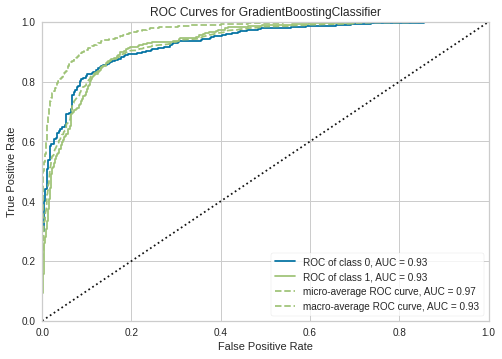

In [72]:
plot_model(tuned_gbc, plot = 'auc')

### Precision-Recall Curve

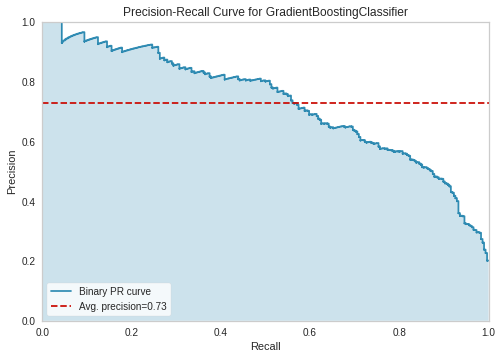

In [73]:
plot_model(tuned_gbc, plot = 'pr')

### Feature Importance Plot

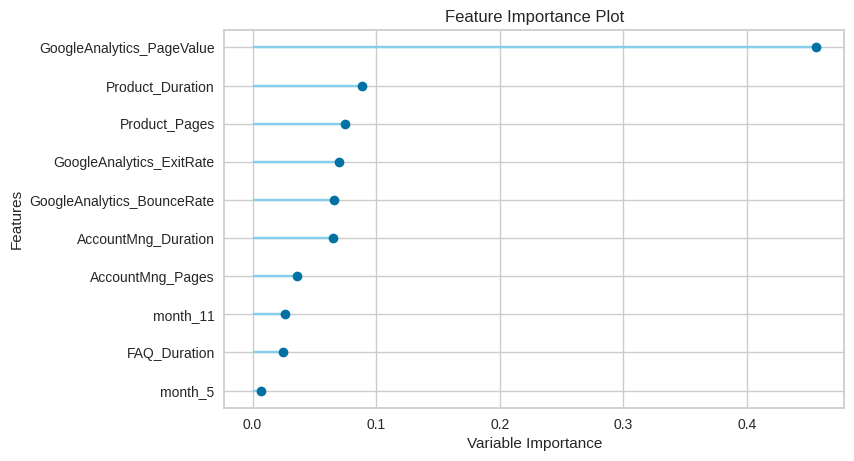

In [74]:
plot_model(tuned_gbc, plot='feature')

### Confusion Matrix

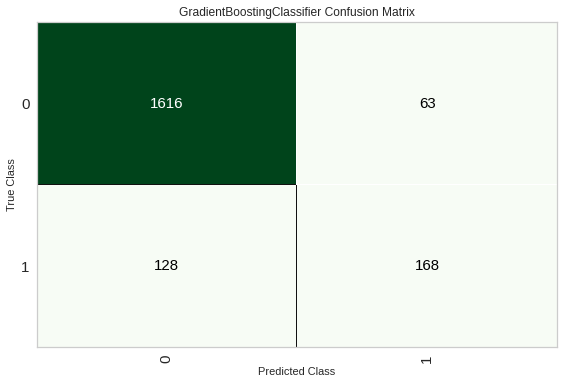

In [75]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

### Evaluate Model

The `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function.

In [76]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predict on test / hold-out Sample



Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section "Setting up Environment in PyCaret" above, you will see that 33% (1,975 samples) of the data has been separated out as test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (66%) only. Now, using our final trained model stored in the `tuned_gbc` variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [77]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9033,0.9291,0.5676,0.7273,0.6376,0.5827,0.5887


,AccountMng_Pages,AccountMng_Duration,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS_Android,OS_Chrome OS,OS_MacOSX,OS_Other,OS_Ubuntu,OS_Windows,OS_iOS,Browser_1,Browser_10,Browser_12,Browser_13,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Country_Brazil,Country_France,Country_Germany,Country_Italy,Country_Other,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom,Type_of_Traffic_1,Type_of_Traffic_10,Type_of_Traffic_11,Type_of_Traffic_12,Type_of_Traffic_13,Type_of_Traffic_14,Type_of_Traffic_15,Type_of_Traffic_2,Type_of_Traffic_3,Type_of_Traffic_4,Type_of_Traffic_5,Type_of_Traffic_6,Type_of_Traffic_7,Type_of_Traffic_8,Type_of_Traffic_9,Type_of_Visitor_New_Access,Type_of_Visitor_Other,Type_of_Visitor_Returner,month_10,month_11,month_12,month_2,month_3,month_5,month_6,month_7,month_8,month_9,Buy,Label,Score
0,0.0,0.000000,0.0,4.0,396.250000,0.0000,0.0833,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9615
1,0.0,0.000000,0.0,19.0,621.726685,0.0105,0.0240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9838
2,1.0,0.000000,0.0,0.0,0.000000,0.2000,0.2000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9292
3,1.0,194.000000,0.0,21.0,304.274994,0.0000,0.0012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9979
4,0.0,0.000000,0.0,12.0,201.666702,0.0182,0.0545,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,0.0,0.000000,0.0,4.0,118.000000,0.0500,0.0667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9981
1971,4.0,40.200001,0.0,12.0,2339.207031,0.0111,0.0369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9874
1972,0.0,0.000000,0.0,1.0,0.000000,0.2000,0.2000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9986
1973,3.0,1715.000000,0.0,20.0,536.616699,0.0000,0.0029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7056


# Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (33% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [84]:
final_gbc = finalize_model(tuned_gbc)

predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.997,0.9999,0.9797,1.0,0.9898,0.988,0.988


,AccountMng_Pages,AccountMng_Duration,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS_Android,OS_Chrome OS,OS_MacOSX,OS_Other,OS_Ubuntu,OS_Windows,OS_iOS,Browser_1,Browser_10,Browser_12,Browser_13,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Country_Brazil,Country_France,Country_Germany,Country_Italy,Country_Other,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom,Type_of_Traffic_1,Type_of_Traffic_10,Type_of_Traffic_11,Type_of_Traffic_12,Type_of_Traffic_13,Type_of_Traffic_14,Type_of_Traffic_15,Type_of_Traffic_2,Type_of_Traffic_3,Type_of_Traffic_4,Type_of_Traffic_5,Type_of_Traffic_6,Type_of_Traffic_7,Type_of_Traffic_8,Type_of_Traffic_9,Type_of_Visitor_New_Access,Type_of_Visitor_Other,Type_of_Visitor_Returner,month_10,month_11,month_12,month_2,month_3,month_5,month_6,month_7,month_8,month_9,Buy,Label,Score
0,0.0,0.000000,0.0,4.0,396.250000,0.0000,0.0833,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8915
1,0.0,0.000000,0.0,19.0,621.726685,0.0105,0.0240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9956
2,1.0,0.000000,0.0,0.0,0.000000,0.2000,0.2000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9514
3,1.0,194.000000,0.0,21.0,304.274994,0.0000,0.0012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9989
4,0.0,0.000000,0.0,12.0,201.666702,0.0182,0.0545,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,0.0,0.000000,0.0,4.0,118.000000,0.0500,0.0667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9974
1971,4.0,40.200001,0.0,12.0,2339.207031,0.0111,0.0369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9652
1972,0.0,0.000000,0.0,1.0,0.000000,0.2000,0.2000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9984
1973,3.0,1715.000000,0.0,20.0,536.616699,0.0000,0.0029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9627


# Predict on unseen data

The predict_model() function is also used to predict on the unseen dataset. The only difference from section "Predict on test / hold-out Sample" above is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning of the tutorial and contains 33% (3,390 samples) of the original dataset which was never exposed to PyCaret.

In [85]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)

unseen_predictions

,AccountMng_Pages,AccountMng_Duration,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,month,Label,Score
0,4,60.2,0.0,8,132.8000,0.0000,0.0091,0.0000,Android,1,Portugal,2,Returner,0,10,0,0.9928
1,7,114.2,0.0,26,360.1817,0.0000,0.0088,0.0000,Android,1,Portugal,2,Returner,0,11,0,0.9938
2,0,0.0,0.0,57,4312.2250,0.0045,0.0320,0.0000,Windows,2,Portugal,2,Returner,0,11,0,0.8071
3,2,386.0,25.0,31,2725.0000,0.0109,0.0175,0.0000,Windows,6,France,5,Returner,0,5,0,0.9970
4,2,22.0,0.0,22,512.0500,0.0438,0.0753,0.0000,Android,1,Spain,2,Returner,0,5,0,0.9980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3,159.0,55.5,23,1100.1250,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,0,5,0,0.9982
3386,6,175.1,0.0,3,27.6000,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0,7,0,0.7878
3387,0,0.0,0.0,27,644.0000,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0,3,0,0.9982
3388,0,0.0,0.0,53,715.5000,0.0226,0.0363,0.0000,Windows,2,Italy,3,Returner,0,5,0,0.9976


In [86]:
# evaluate predictions
accuracy = accuracy_score(unseen_predictions['Buy'], unseen_predictions['Label'])
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.75%


In [89]:
# evaluate predictions
f1_score = f1_score(unseen_predictions['Buy'], unseen_predictions['Label'])
print("f1_score: %.2f%%" % (f1_score * 100.0))

f1_score: 85.74%


Confusion Matrix - absolute values:
[[2813   45]
 [  99  433]]


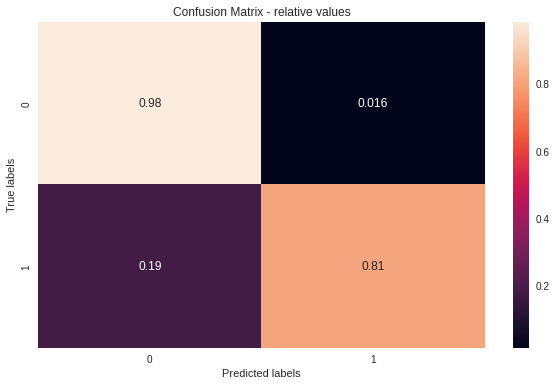

In [90]:
print('Confusion Matrix - absolute values:')
print(confusion_matrix(unseen_predictions['Buy'], unseen_predictions['Label']))

plt.figure(figsize=(10,6))
cm = confusion_matrix(unseen_predictions['Buy'], unseen_predictions['Label'])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix - relative values'); 
ax.xaxis.set_ticklabels(['0', '1']); 
ax.yaxis.set_ticklabels(['0', '1']);

In [91]:
print('Classification Report:')
print(classification_report(unseen_predictions['Buy'], unseen_predictions['Label']))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2858
           1       0.91      0.81      0.86       532

    accuracy                           0.96      3390
   macro avg       0.94      0.90      0.92      3390
weighted avg       0.96      0.96      0.96      3390

